In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import librosa.display
import numpy as np

In [2]:
from src.segment import AudioSegment
sr = 22050

In [3]:
def analysis(file):
    segment = AudioSegment()
    segment.load(file, offset=60, length = 3, target_sr=sr)
    segment.addFeatures()
    features = segment.results.keys()
    for i, key in enumerate(segment.results.keys()):
        feature = segment.results[key]
        feature_shape = np.array(feature).shape
        feature_type = type(feature)
        if feature_type in [int] or feature_shape is ():
            print(i, key, feature_type, feature_shape, feature)
            continue
        if(feature_shape[0] == 1):
            feature = feature[0]
            feature_shape = np.array(feature).shape
            feature_type = type(feature)
            
        if(len(feature_shape) == 1):
            print(i, key, feature_type, feature_shape)
            fig, ax = plt.subplots()
            img = librosa.display.waveshow(feature, x_axis='time', ax=ax)
            ax.set(title=f'{key.title()}')
        else:
            print(i, key, feature_type, feature_shape)
            fig, ax = plt.subplots()
            img = librosa.display.specshow(feature, x_axis='time', y_axis='linear', ax=ax)
            ax.set(title=f'{key.title()}')
            fig.colorbar(img, ax=ax)
            # fig.colorbar(img, ax=ax, format="%+2.f dB")

0 rms <class 'numpy.ndarray'> (130,)
1 length <class 'int'> () 66150
2 tonnetz <class 'numpy.ndarray'> (6, 130)
3 mfcc <class 'numpy.ndarray'> (20, 130)
4 chroma <class 'numpy.ndarray'> (12, 130)
5 chroma_stft <class 'numpy.ndarray'> (12, 130)
6 spectral_centroid <class 'numpy.ndarray'> (130,)
7 spectral_contrast <class 'numpy.ndarray'> (7, 130)
8 spectral_bandwidth <class 'numpy.ndarray'> (130,)
9 spectral_rolloff <class 'numpy.ndarray'> (130,)
10 zero_crossing_rate <class 'numpy.ndarray'> (130,)
11 harmony <class 'numpy.ndarray'> (66150,)
12 tempo <class 'numpy.float64'> () 123.046875


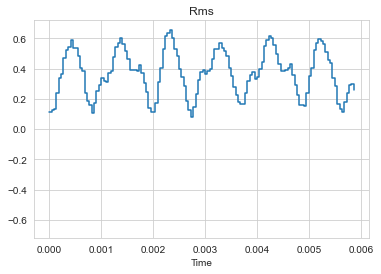

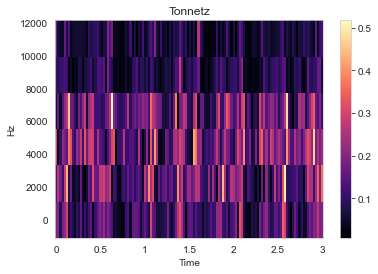

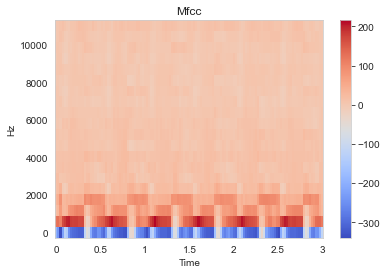

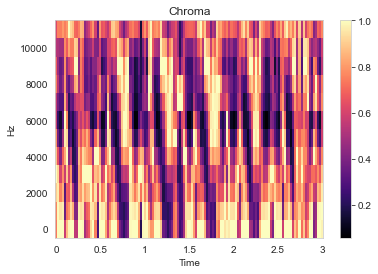

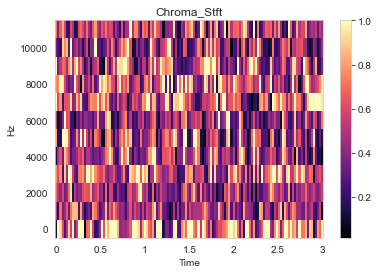

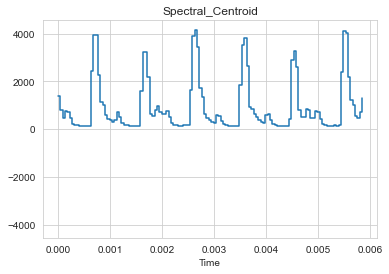

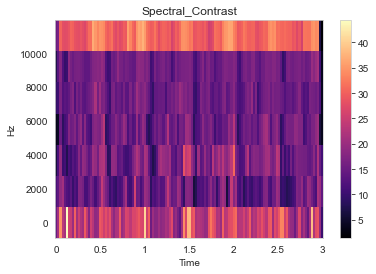

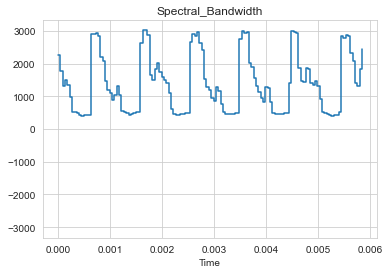

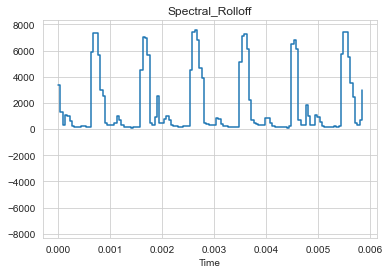

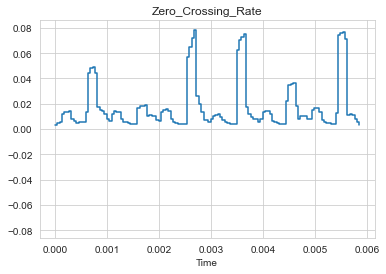

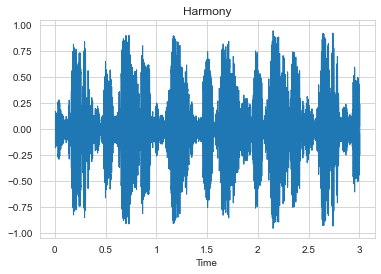

In [4]:
analysis('E://Music//House//deep//AL005 - Hunter_Game - Illusion.mp3')

0 rms <class 'numpy.ndarray'> (130,)
1 length <class 'int'> () 66150
2 tonnetz <class 'numpy.ndarray'> (6, 130)
3 mfcc <class 'numpy.ndarray'> (20, 130)
4 chroma <class 'numpy.ndarray'> (12, 130)
5 chroma_stft <class 'numpy.ndarray'> (12, 130)
6 spectral_centroid <class 'numpy.ndarray'> (130,)
7 spectral_contrast <class 'numpy.ndarray'> (7, 130)
8 spectral_bandwidth <class 'numpy.ndarray'> (130,)
9 spectral_rolloff <class 'numpy.ndarray'> (130,)
10 zero_crossing_rate <class 'numpy.ndarray'> (130,)
11 harmony <class 'numpy.ndarray'> (66150,)
12 tempo <class 'numpy.float64'> () 112.34714673913044


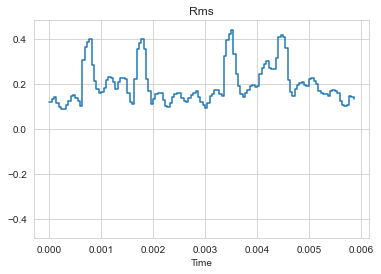

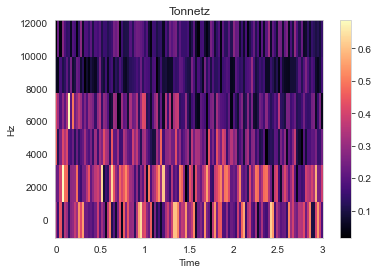

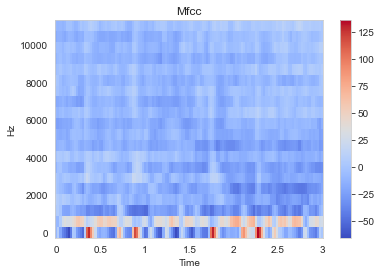

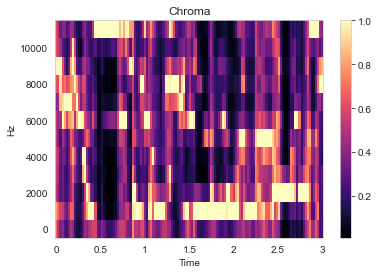

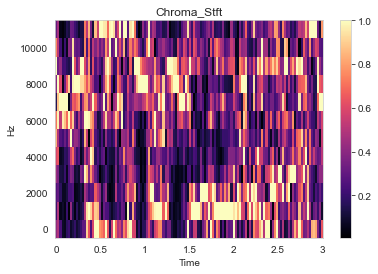

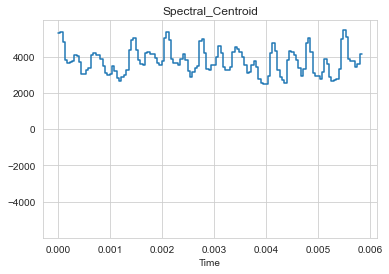

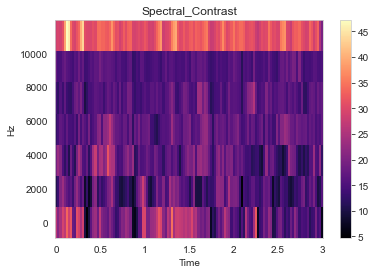

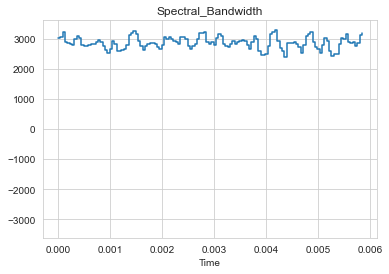

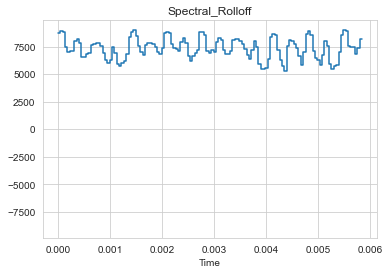

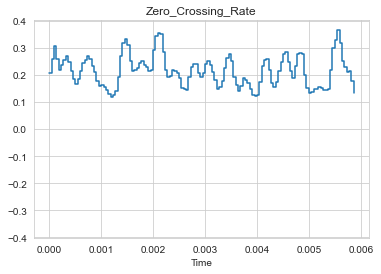

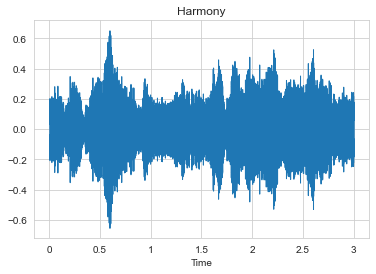

In [5]:
analysis('D://Musik//Genres//Deep//Black Uhuru - Shine Eye Gal (Lupo Re-Fix) [13K FREE DOWNLOAD]_872809999 - Lupo [OCC].mp3')